# Happiness Factors and Their Impact on Society

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

This project looks at over 50 countries' suicide rates within the last 20 years and explores the relationship between a countries' social support, healthy life expectancy, freedom to make life choices, and generosity value to the suicide rates of those countries. For example, someone may expect a country with a high life expectancy and freedom value to have the least amount of suicides. Our goal is to determine if these intuitions are true and whether or not there may be other trends in our data.

# Names

- Kenneth Lam
- Bateliel Bassa
- Zhi Liang

<a id='research_question'></a>
# Research Question

We want to find what effect factors such as social support, life expectancy, and freedom to make life choices have in determining the suicide rate of a country and our proposed research question is:

"Is there any correlation between countries' metrics in the World Happiness Report, as established by the similarly named organization, and suicide statistics provided by the World Health Organization during the time period of 2005 to 2017?"

<a id='background'></a>

## Background & Prior Work

Happiness is a important state for most people to feel for their day to day lives. These world happiness reports, as said by experts in various fields such as economy and national statistics, are used in order to help define the progress of nations along with other things.(1) This can be seen in the use of well being surveys, a model to measure individual happiness was used in order to rank individual cities conditions. (2) In one study (4), it was found how happy people are has a strong influence on health at old age. As it turns out, people in happier relationships generally lived longer, had better memory functions, and felt less emotional and physical pain. 

Suicide, on the other hand, as a topic itself that could widely be considered the opposite to happiness. For example, the association of suicide with another particularly negative topic, unemployment, led to a 2-3 times chance of death from suicide.(3) Using this as a measure of the opposite to the world happiness scale, we should be able to potentially see an effect between the two.

References (include links):
<br>(1): https://en.wikipedia.org/wiki/World_Happiness_Report#cite_note-8 
<br>(2): https://worldhappiness.report/ed/2020/cities-and-happiness-a-global-ranking-and-analysis/ 
<br>(3): https://jech.bmj.com/content/57/8/594
<br>(4) https://news.harvard.edu/gazette/story/2017/04/over-nearly-80-years-harvard-study-has-been-showing-how-to-live-a-healthy-and-happy-life/

# Hypothesis


Our hypothesis is that countries with lower happiness will have more suicides. This is due to the fact that one of the main causes of suicide is depression and places with lower happiness rates tend to have less happy people. Another reason a country with a lower happiness rate might be more prone to suicides is drug abuse. People may turn to drugs to increase their happiness levels in the short run, but long term use of drugs is linked to suicidal thoughts.

# Dataset(s)

- Dataset Name: WHO Suicide Statistics
- Link to the dataset: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
- Number of observations: This dataset originally had 43776 observations, however some of them are NaN values so after dropping those we have 36060 observations.

Using this dataset, we will look at different countries and find the amount of suicides in each year relative to the total population and compare that with the happiness levels of that particular country using our second data set. This data set contains information about the year, sex, age, number of suicides, and population of a country.

- Dataset Name: World Happiness Report 2021
- Link to the dataset: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
- Number of observations: This includes two datasets, one for years leading up to 2021, and one for just the year 2021. We will be using the former and that dataset has 1949 observations.

We will look at the different happiness categories in this data set and compare it to the suicide rates of each country to see how each factor of happiness affects the number of suicides. This data set contains information about social support, healthy life expectancy, freedom, generosity, and perceptions of corruption of a particular country.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Data Cleaning

This dataset (WHO suicide) did not deal with any sensitive information to any specific person, so there was no need to filter out anything in terms of privacy. One of the major things we had to deal with was finding a way to combine all the numbers of suicides of a country disregarding gender as the gender was not relevant to our hypothesis.

The dataset is not very clean as there were multiple rows with no suicide information which defeats the purpose of the data set. The rows with no suicide information is not very useful to us so we dropped every row with NaN values to make the entire dataset relevant. We used dropna() to drop all NaN values and reset the index so the countries are ordered by name ascending.

In [2]:
who_suicide = pd.read_csv("who_suicide_statistics.csv")

In [3]:
who_suicide.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


Here, we will remove the multiple rows with no suicide information. The part of the dataset we removed was only ~18% of the data set so we are left with 36060 entries which is more than enough for our purposes.

In [4]:
who_suicide = who_suicide.dropna().reset_index(drop = True)

In [5]:
suicide_total = who_suicide.groupby(["country", "year"]).agg({'suicides_no':'sum', 'population': 'sum'}).reset_index()

'''
We then add a column with the ratio of suicides to population for each country for each year so we can compare each 
country
'''
suicide_total["ratio"] = suicide_total["suicides_no"]/suicide_total["population"]
suicide_total

,country,year,suicides_no,population,ratio
0,Albania,1987,73.0,2709600.0,0.000027
1,Albania,1988,63.0,2764300.0,0.000023
2,Albania,1989,68.0,2803100.0,0.000024
3,Albania,1992,47.0,2822500.0,0.000017
4,Albania,1993,73.0,2807300.0,0.000026
...,...,...,...,...,...
3000,Virgin Islands (USA),2009,9.0,98960.0,0.000091
3001,Virgin Islands (USA),2010,8.0,98658.0,0.000081
3002,Virgin Islands (USA),2011,8.0,98290.0,0.000081
3003,Virgin Islands (USA),2012,10.0,98069.0,0.000102


Here, we remove the sex and age from our who_suicide dataframe since we will not use that in our calculations and we get the total number of suicides for that year and the total population instead. We then add a column with the ratio of suicides to population for each country for each year so we can compare each country.

In [6]:
who_suicide = who_suicide.groupby(["country", "year"]).agg({'suicides_no':'sum', 'population': 'sum'}).reset_index()
who_suicide["ratio"] = suicide_total["suicides_no"]/suicide_total["population"]
who_suicide.head()

,country,year,suicides_no,population,ratio
0,Albania,1987,73.0,2709600.0,0.000027
1,Albania,1988,63.0,2764300.0,0.000023
2,Albania,1989,68.0,2803100.0,0.000024
3,Albania,1992,47.0,2822500.0,0.000017
4,Albania,1993,73.0,2807300.0,0.000026


Now that we have partially cleaned the dataset, we can read in our other dataset the World Happiness Report. This data is very clean as all the data is formatted tidily and everything is labeled well. We did not have to do anything to get this data set into a usable format since we are able to easily navigate through the dataset and get information about the different happiness factors for each country.

In [7]:
world_happiness = pd.read_csv("world-happiness-report.csv")

In [8]:
world_happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Our goal in this project is to look at the relationship between world happiness and suicide rates. For this goal, we should first understand how many countries we are dealing with, and what time periods we are working in. 

In [9]:
who_suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

In [10]:
world_happiness['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

We only want the countries that are in both world_happiness and who_suicide, so let's filter countries that don't fit this criteria.

In [11]:
who_unique = who_suicide['country'].unique()
happy_unique = world_happiness['Country name'].unique()

# First, we get common countries.

common = set(who_unique).intersection(happy_unique)
common_list = list(common)
print('Common_countries:', common_list)

# Then, we filter out entries not in the list of countries.

who_country_filter = who_suicide.loc[who_suicide['country'].isin(common_list)]
display(who_country_filter)

happy_country_filter = world_happiness.loc[world_happiness['Country name'].isin(common_list)]
happy_country_filter

Common_countries: ['Guatemala', 'United Arab Emirates', 'Israel', 'Belize', 'Netherlands', 'Portugal', 'Montenegro', 'South Africa', 'Sweden', 'Lithuania', 'Philippines', 'Thailand', 'Austria', 'Brazil', 'France', 'Greece', 'Italy', 'Finland', 'Ukraine', 'Paraguay', 'Mongolia', 'Slovakia', 'El Salvador', 'Denmark', 'Bulgaria', 'Croatia', 'Mauritius', 'Norway', 'Turkmenistan', 'Hungary', 'Luxembourg', 'Czech Republic', 'Trinidad and Tobago', 'Belgium', 'Canada', 'Chile', 'Bosnia and Herzegovina', 'Suriname', 'Cuba', 'Azerbaijan', 'Egypt', 'Nicaragua', 'Japan', 'Uzbekistan', 'Singapore', 'Qatar', 'Switzerland', 'Kyrgyzstan', 'Turkey', 'Bahrain', 'Malta', 'Cyprus', 'Romania', 'Uruguay', 'Mexico', 'Serbia', 'Latvia', 'Kuwait', 'Sri Lanka', 'Ireland', 'Jamaica', 'United Kingdom', 'Slovenia', 'Armenia', 'Iceland', 'Maldives', 'Argentina', 'Poland', 'Belarus', 'Germany', 'Costa Rica', 'Panama', 'New Zealand', 'Ecuador', 'Oman', 'Australia', 'Spain', 'Georgia', 'Guyana', 'Estonia', 'Colombia',

,country,year,suicides_no,population,ratio
0,Albania,1987,73.0,2709600.0,0.000027
1,Albania,1988,63.0,2764300.0,0.000023
2,Albania,1989,68.0,2803100.0,0.000024
3,Albania,1992,47.0,2822500.0,0.000017
4,Albania,1993,73.0,2807300.0,0.000026
...,...,...,...,...,...
2950,Uzbekistan,2010,1464.0,25651783.0,0.000057
2951,Uzbekistan,2011,1640.0,25978049.0,0.000063
2952,Uzbekistan,2012,1835.0,26381830.0,0.000070
2953,Uzbekistan,2013,1950.0,26838924.0,0.000073


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
1874,Uzbekistan,2015,5.972,8.714,0.968,64.20,0.980,0.375,0.471,0.840,0.103
1875,Uzbekistan,2016,5.893,8.756,0.945,64.50,0.984,0.208,NaN,0.842,0.147
1876,Uzbekistan,2017,6.421,8.782,0.942,64.80,0.985,0.123,0.465,0.839,0.203
1877,Uzbekistan,2018,6.205,8.818,0.921,65.10,0.970,0.318,0.520,0.825,0.209


Similarly, we want our data to be taken during the same time as well. Once again, we will filter out any entries with different time periods than what is shared between them.

In [12]:
who_year_unique = who_suicide['year'].unique()
happy_year_unique = world_happiness['year'].unique()


common_year = set(who_year_unique).intersection(happy_year_unique)
common_year_list = list(common_year)
common_year_list = sorted(common_year_list)
print('Common Years:' , common_year_list)

who_year_filter = who_country_filter.loc[who_country_filter['year'].isin(common_year_list)]
display(who_year_filter)

happy_year_filter = happy_country_filter.loc[happy_country_filter['year'].isin(common_year_list)]
happy_year_filter

Common Years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


,country,year,suicides_no,population,ratio
16,Albania,2005,0.0,2783320.0,0.000000
17,Albania,2006,0.0,2780176.0,0.000000
18,Albania,2007,124.0,2770344.0,0.000045
19,Albania,2008,160.0,2757059.0,0.000058
20,Albania,2009,0.0,2745735.0,0.000000
...,...,...,...,...,...
2950,Uzbekistan,2010,1464.0,25651783.0,0.000057
2951,Uzbekistan,2011,1640.0,25978049.0,0.000063
2952,Uzbekistan,2012,1835.0,26381830.0,0.000070
2953,Uzbekistan,2013,1950.0,26838924.0,0.000073


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
1871,Uzbekistan,2012,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
1872,Uzbekistan,2013,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130
1873,Uzbekistan,2014,6.049,8.659,0.952,64.00,0.954,0.061,0.536,0.805,0.106
1874,Uzbekistan,2015,5.972,8.714,0.968,64.20,0.980,0.375,0.471,0.840,0.103


From this, we can see that the intersecting time periods for this data is from
2005 to 2016. 

In [13]:
who_suicide = who_year_filter.dropna().reset_index(drop = True)
display(who_suicide)

world_happiness = happy_year_filter.dropna().reset_index(drop = True)
world_happiness

,country,year,suicides_no,population,ratio
0,Albania,2005,0.0,2783320.0,0.000000
1,Albania,2006,0.0,2780176.0,0.000000
2,Albania,2007,124.0,2770344.0,0.000045
3,Albania,2008,160.0,2757059.0,0.000058
4,Albania,2009,0.0,2745735.0,0.000000
...,...,...,...,...,...
796,Uzbekistan,2010,1464.0,25651783.0,0.000057
797,Uzbekistan,2011,1640.0,25978049.0,0.000063
798,Uzbekistan,2012,1835.0,26381830.0,0.000070
799,Uzbekistan,2013,1950.0,26838924.0,0.000073


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,2007,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
1,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
2,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
3,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257
4,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271
...,...,...,...,...,...,...,...,...,...,...,...
673,Uzbekistan,2011,5.739,8.493,0.924,63.40,0.934,0.042,0.522,0.787,0.123
674,Uzbekistan,2012,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
675,Uzbekistan,2013,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130
676,Uzbekistan,2014,6.049,8.659,0.952,64.00,0.954,0.061,0.536,0.805,0.106


We only want the information from the world happiness report that has the country and year overlap so we 
merge the two dataframes together if they have same country and year.

In [14]:
world_happiness = world_happiness.rename(columns = {"Country name": "country"})
final = pd.merge(suicide_total, world_happiness, how = "inner", on = ["country", "year"])
final

,country,year,suicides_no,population,ratio,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,2007,124.0,2770344.0,0.000045,4.634,9.142,0.821,65.80,0.529,-0.009,0.875,0.553,0.246
1,Albania,2009,0.0,2745735.0,0.000000,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279
2,Albania,2010,96.0,2736025.0,0.000035,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300
3,Argentina,2006,3108.0,35918886.0,0.000087,6.313,9.942,0.938,66.82,0.733,-0.157,0.852,0.825,0.328
4,Argentina,2007,2946.0,36315492.0,0.000081,6.073,10.018,0.862,66.94,0.653,-0.141,0.881,0.828,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Uruguay,2015,630.0,3190795.0,0.000197,6.628,9.932,0.891,68.70,0.917,-0.032,0.673,0.893,0.300
542,Uzbekistan,2011,1640.0,25978049.0,0.000063,5.739,8.493,0.924,63.40,0.934,0.042,0.522,0.787,0.123
543,Uzbekistan,2012,1835.0,26381830.0,0.000070,6.019,8.550,0.933,63.60,0.914,-0.037,0.463,0.786,0.118
544,Uzbekistan,2013,1950.0,26838924.0,0.000073,5.940,8.607,0.963,63.80,0.950,-0.034,0.434,0.749,0.130


And now we are finished cleaning our data and we can use our final dataset!

# Data Analysis & Results

First, lets take a look at the distribution of our data set.

[Text(0, 0, 'Albania'),
 Text(1, 0, 'Argentina'),
 Text(2, 0, 'Armenia'),
 Text(3, 0, 'Australia'),
 Text(4, 0, 'Austria'),
 Text(5, 0, 'Azerbaijan'),
 Text(6, 0, 'Bahrain'),
 Text(7, 0, 'Belarus'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Belize'),
 Text(10, 0, 'Bosnia and Herzegovina'),
 Text(11, 0, 'Brazil'),
 Text(12, 0, 'Bulgaria'),
 Text(13, 0, 'Canada'),
 Text(14, 0, 'Chile'),
 Text(15, 0, 'Colombia'),
 Text(16, 0, 'Costa Rica'),
 Text(17, 0, 'Croatia'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Czech Republic'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Ecuador'),
 Text(22, 0, 'Egypt'),
 Text(23, 0, 'El Salvador'),
 Text(24, 0, 'Estonia'),
 Text(25, 0, 'Finland'),
 Text(26, 0, 'France'),
 Text(27, 0, 'Georgia'),
 Text(28, 0, 'Germany'),
 Text(29, 0, 'Greece'),
 Text(30, 0, 'Guatemala'),
 Text(31, 0, 'Guyana'),
 Text(32, 0, 'Hungary'),
 Text(33, 0, 'Iceland'),
 Text(34, 0, 'Ireland'),
 Text(35, 0, 'Israel'),
 Text(36, 0, 'Italy'),
 Text(37, 0, 'Jamaica'),
 Text(38, 0, 'Japan'),
 Text(39, 0

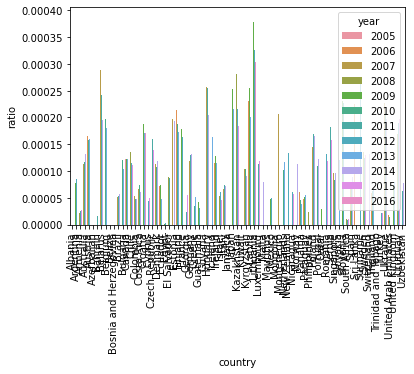

In [15]:
# Visualization of suicides by country and year
distribution = sns.barplot(data = final, x = "country", y = "ratio", hue = "year")
plt.legend(loc = "upper right", title = "year")
distribution.set_xticklabels(distribution.get_xticklabels(), rotation = 90)

We can use a scatterplot matrix to see which variables might be related in our table.

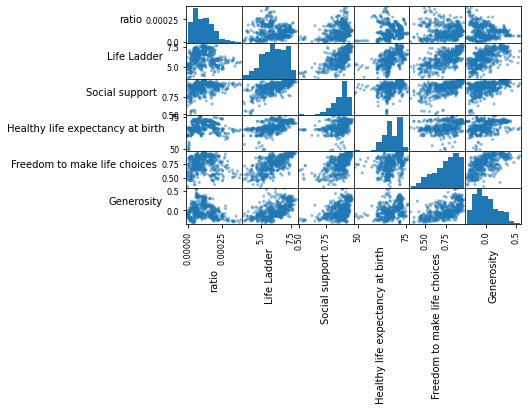

In [16]:
fig = pd.plotting.scatter_matrix(final[["ratio", "Life Ladder", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity"]])
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

Lets look at each of our variables and the relationship those variables have with the suicide rate.

Here we can see the number of suicides correlates negatively to social support and there are not really any outliers.

In [ ]:
social_support_graph = sns.lmplot(data = final, x = "Social support", y = "ratio", col = "country", col_wrap = 4, height = 5)

Here we can see the number of suicides correlates negatively to healthy life expectancy which is expected.

In [ ]:
healthy_graph = sns.lmplot(data = final, x = "Healthy life expectancy at birth", y = "ratio", hue = "country", col = "country", col_wrap = 4, height = 5)

Here we can see the number of suicides does not have much correlation to freedom to make life choices. There are a few outliers spread out all throughout the plots.

In [ ]:
freedom_graph = sns.lmplot(data = final, x = "Freedom to make life choices", y = "ratio", hue = "country", col = "country", col_wrap = 4, height = 5)

Here we can see the number majority of suicides correlates negatively to generosity.

In [ ]:
generosity_graph = sns.lmplot(data = final, x = "Generosity", y = "ratio", hue = "country", col = "country", col_wrap = 4, height = 5)

Here we can see the number of suicides correlates positively to the perception of corruption. There are a few outliers, but most of the data is concentrated on the right.

In [ ]:
corruption_graph = sns.lmplot(data = final, x = "Perceptions of corruption", y = "ratio", hue = "country", col = "country", col_wrap = 4, height = 5)

We can also use a Support Vector Machine algorithm in order to attempt to predict happy or unhappy countries through certain features.

In [ ]:
# Creating simple labels for Countries based on Life Ladder value. 
# 0 <= 5 is unhappy and is indicated as 0, 6 < is happy and indicated by 1.

print(len(final))
not_happy_ind = final[final["Life Ladder"] <= 5].index
final['happy'] = np.ones((len(final),1), dtype = int)
for i in range(len(final)):
    if i in not_happy_ind:
        final['happy'][i] = 0
    else:
        continue

final

In [ ]:
# Following SVM Supervised ML from D8
ind = int(len(final)*.6)
num_training = ind
num_testing = len(final) - ind

In [ ]:
final_X = final[["ratio", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity"]]
final_Y = np.asarray(final['happy'])

In [ ]:
final_train_X = final_X[0:num_training]
final_test_X = final_X[num_training:]
final_train_Y = final_Y[0:num_training]
final_test_Y = final_Y[num_training:]

In [ ]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    
    return clf

In [ ]:
final_clf = train_SVM(final_train_X, final_train_Y)

In [ ]:
final_predicted_train_Y = final_clf.predict(final_train_X)
final_predicted_test_Y = final_clf.predict(final_test_X)

In [ ]:
class_report_train = classification_report(final_train_Y, final_predicted_train_Y)
print(class_report_train)
# The recall here is really low for unhappy results using these predictors. Maybe predicts too many results as positive? (recall = TP/TP + FN)

In [ ]:
class_report_test = classification_report(final_test_Y, final_predicted_test_Y)
print(class_report_test)


In [ ]:
conf_mat_train = confusion_matrix(final_train_Y, final_predicted_train_Y)
print(conf_mat_train)

In [ ]:
conf_mat_test = confusion_matrix(final_test_Y, final_predicted_test_Y)
print(conf_mat_test)

The test rates overall for unhappy countries is really low, and this could have occurred for a couple of reasons. The first being that the features that we chose to predict happiness would not translate to unhappiness. In this case, other features may be better for this task. The second is that the overall set of unhappy countries is fairly lower. It would be more likely that the second scenario affected this result more, due to the low test numbers for unhappy countries. To solve this we could use more data that fits both criteria, or to change the goalposts on what is an unhappy country, which would be difficult to pin down.

# Ethics & Privacy

The dataset we used to find the number of suicides for a particular country is publicly available on WHO's (World Health Organization) website. To our knowledge, the data collected by WHO was collected ethically with consent from the party or their family. A point of concern is that the person whose data was collected may not have had anyone to release permission, but no identifying information is in the dataset so they still would not be able to be indentified. For each country, the only identifiable information was the gender and age range, so there should be no way to trace the information back to a particular person. We, however, only use the countries and number of suicides, disregarding the gender and the age range, in our dataset so the indenties of a certain indivual are less private than they were in the original dataset.

The second dataset came from the World Happiness Report. The data was collected through a poll so it is ensured that everyone consented to providing their information. There is no personally indentifiable information in this dataset other than the country the participant resides in. One concern about this dataset is the collection method. Because the poll was voluntary, individuals may have left certain attributes blank and skewed the results. Another concern may be that only a small population of the country decided to partake in the survey, further skewing the results and making the results not indicative of the entire country. Overall this dataset may not have had many issues concerning ethics and privacy, but because of the method of data collection, it may have skewed results.

Our final dataset, which combines the data from WHO and the World Happiness Report, may not be representative of every country as it only contains 40% of the worlds' countries.

# Conclusion & Discussion

Our research question was to look at the different factors of happiness in each country and determine if there was any relationship between them and the suicide rates. We looked for trends using exploratory data analysis and visualizations and also used models to determine the precision of our data. Using a model, we were able to determine what factors were most predictive to the suicide rate.

As our hypothesis predicted, lower happiness rates do correlate with more suicides. When comparing factors like social support, healthy life expectancy, freedom to make life choices, and generosity, we found that positive factors, such as social support and freedom tended to negatively correlate with suicide rates. Negative factors, such as perceptions to corruption, positively correlated to suicide rates. As seen by our data visualizations, this trend was consistent for most countries in our dataset.

We observed a downward trend in social support vs suicide rates in most countries, which suggests that social support may be as important in preventing suicides as we expect it to be. The data also suggests that freedom to make life choices does not really affect the suicide rate, which is odd since it is theorized that more people often commit suicide when they feel like they are trapped.

One of the biggest limitations we had was the dataset we used and how data was collected. The only information about the different factors of happiness we were able to use was received by volunteers, which, while is good ethically, may have skewed our data since it is not likely that the people who responded to the survey in the World Happiness Report had an accurate view of the state of the country. This is unideal since we would have liked our representation for the World Happiness Report to have covered all populations or have more overlap with the WHO dataset population.

Another limitation we had was that, for some countries, there was not a big overlap in years from our WHO dataset and our World Happiness Report dataset. This means that the trend line for a particular country may have been inaccurate due to lack of data. This results in a skewed prediction when we try to gather all our data to try and predict what would happen in general for an arbitrary country.

# Team Contributions

Kenneth 
- worked on written portion
- retrieved data
- cleaned data
- generated graphs
- data analysis

Bateliel 
- worked on written portion
- retrieved data
- cleaned data
- generated graphs using supervised learning
- data analysis

Zhi Liang
- proposal
- worked on written portion


# Final Project Video

Final Project Video Link : https://youtu.be/K7y-xlNGaBk